## CthulhuTech / Framewerk

In this system, the player rolls a pool of d10s. The player may choose one of the following:

* One matching set of at least 1 die.
* One straight of at least 3 dice.

All of those dice are summed to form the result.

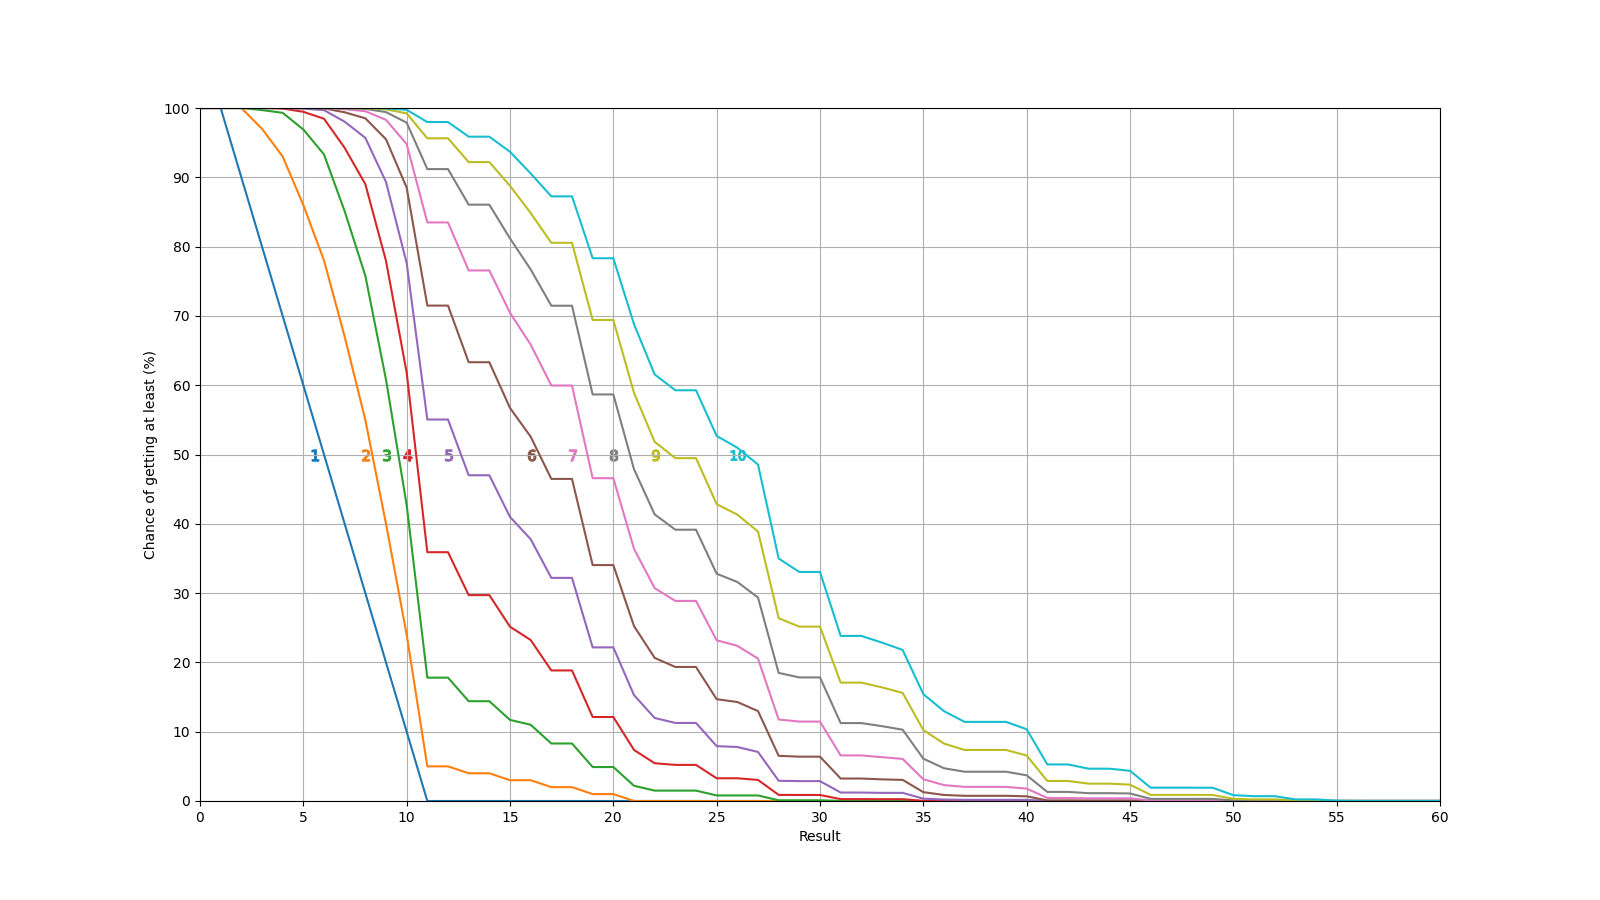

In [1]:
import piplite
await piplite.install("icepool")

import icepool

class CthulhuTechEval(icepool.MultisetEvaluator):
    def next_state(self, state, outcome, count):
        score, run = state or (0, 0)
        if count > 0:
            set_score = outcome * count
            run_score = 0
            run += 1
            if run >= 3:
                # This could be the triangular formula, but it's clearer this way.
                for i in range(run): run_score += (outcome - i)
            score = max(set_score, run_score, score)
        else:
            # No dice rolled this number, so the score remains the same.
            run = 0
        return score, run

    def final_outcome(self, final_state):
        # Return just the score.
        return final_state[0]
    
    # Outcomes should be seen in consecutive order.
    alignment = icepool.MultisetEvaluator.range_alignment

import matplotlib.pyplot as plt

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
evaluator = CthulhuTechEval()
figsize = (16, 9)
fig, ax = plt.subplots(figsize=figsize)

for num_dice in range(1, 11):
    pool = icepool.d10.pool(num_dice)
    result = evaluator.evaluate(pool)
    result, _, _ = icepool.align_range(result, 0, 100)
    ax.plot(result.outcomes(), result.probabilities_ge(percent=True))
    marker_size = 64 if num_dice < 10 else 128
    ax.scatter(result.median(), 50.0,
               marker=('$%d$' % num_dice),
               facecolor=default_colors[num_dice-1],
               s=marker_size)

ax.set_xticks(range(0, 61, 5))
ax.set_yticks(range(0, 101, 10))
ax.set_xlim(0, 60)
ax.set_ylim(0, 100)
ax.set_xlabel('Result')
ax.set_ylabel('Chance of getting at least (%)')
ax.grid()
plt.show()